<a href="https://colab.research.google.com/github/derrickgreenspan/COT5600/blob/master/Homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem 1**

Implement a simulation of the Hadamard test for any qubit state |psi> and any single qubit unitary U using numpy. Observe that you have to compute how the state of the quantum register changes. It is not enough to just code up the formula for the probabilities that we derived in class.

Recall that you can realize the controlled-U gate as follows: $|0><0| \otimes I + |1><1| \otimes U$. Use the numpy command np.kron for the tensor product.

For $|\psi>$ use the state $|0>$ and for the unitary U use the orthogonal matrix that describes the rotation by angle $2\pi \theta$, where $\theta \in [0, 1)$.

Create a plot showing the probability Pr(0) in dependence on theta.

**Code**

In [0]:
import numpy as np
import scipy as sp
from matplotlib import pyplot
from scipy import linalg as la

# Define standard matrices
ket_0 = np.array([[1],[0]])
ket_1 = np.array([[0],[1]])
identity = np.matrix([[1,0],[0,1]])
hadamard_matrix = np.matrix([[1,1],[1,-1]])

# Define outer product
def outer_product(ket_psi):
  bra_psi = np.conj(ket_psi).T
  return np.matmul(ket_psi, bra_psi)

def controlled_gate(U, ket_psi):
  return np.dot((np.kron(outer_product(ket_0), identity) +
           (np.kron(outer_product(ket_1), U))), ket_psi)
  
def hadamard_gate(ket_psi):
  return np.matmul(((1/(np.sqrt(2)))*hadamard_matrix),ket_psi)

def hadamard_test(ket_psi, U):
  # Step 1
  h1 = hadamard_gate(ket_0)
  h1 = np.kron(h1, ket_psi)

  # Step 2
  controlled_U = controlled_gate(U, h1)

  # Step 3
  H_matrix = (1/(np.sqrt(2))) * hadamard_matrix 
  apply_H_on_first_qbit = np.kron(H_matrix, identity)
  step_3_result = np.dot(apply_H_on_first_qbit, controlled_U)
  
  # Step 4
  # Perform a mesaurement on the first qubit with the projector operator
  result = la.norm(np.dot(np.kron(outer_product(ket_0), identity), step_3_result)) ** 2
  return result

**Testing**

Use the rotational matrix 

$U = \left(\begin{array}{cc}\cos(2\pi\theta) & -\sin(2\pi\theta) \\ \sin(2\pi\theta) & \cos(2\pi\theta) \end{array}\right)$

For testing. We assume that $|\psi\rangle = |0\rangle$, and $\theta \in [0,1)$


Text(0, 0.5, 'Probability')

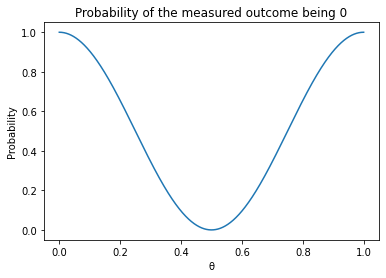

In [0]:
ket_psi = ket_0
testing_size = 5000
theta = np.linspace(0., 0.999999, testing_size)
probe = np.empty(testing_size)
for i in range(testing_size):
  theta_angle = 2*np.pi*theta[i]
  U = np.array(([np.cos(theta_angle), -np.sin(theta_angle)],[np.sin(theta_angle), np.cos(theta_angle)]))
  probe[i] = hadamard_test(ket_psi, U)

pyplot.plot(theta, probe)
pyplot.title('Probability of the measured outcome being 0')
pyplot.xlabel('θ')
pyplot.ylabel('Probability')


# **Problem 2**

Implement a simulation of the SWAP test.

Use $|\psi_1\rangle = |0\rangle$ and $|\psi_2\rangle = \cos(2 \pi \theta) |0\rangle + \sin(2 \pi \theta) |1\rangle$. Create a plot showing the probability Pr(0) in dependence on theta.

**Code**

In [0]:
def controlled_swap_gate(ket_psi):
  swap = np.array([[1,0,0,0,0,0,0,0],
                  [0,1,0,0,0,0,0,0],
                  [0,0,1,0,0,0,0,0],
                  [0,0,0,1,0,0,0,0],
                  [0,0,0,0,1,0,0,0],
                  [0,0,0,0,0,0,1,0],
                  [0,0,0,0,0,1,0,0],
                  [0,0,0,0,0,0,0,1]])
  return np.dot(swap, ket_psi)

def swap_test(ket_psi_1, ket_psi_2):
  # Step 1
  h1 = hadamard_gate(ket_0)
  hadamard_gate_ket_0 = np.kron(np.kron(h1, ket_psi_1), ket_psi_2)
  #print(hadamard_gate_ket_0)
  #print("\n")

  # Step 2
  controlled_swap = controlled_swap_gate(hadamard_gate_ket_0)
  #print(h2)

  # Step 3
  H_matrix = (1/(np.sqrt(2))) * hadamard_matrix 
  apply_H_on_first_qbit = np.kron(np.kron(H_matrix, identity),identity)
  step_3_result = np.dot(apply_H_on_first_qbit, controlled_swap)
  #print(step_3_result)

  # Step 4
  # Perform a mesaurement on the first qubit with the projector operator
  result = la.norm(np.dot(np.kron(np.kron(outer_product(ket_0), identity), identity),step_3_result)) ** 2
  return result

**Testing**

Use the rotational matrix

$U = \left(\begin{array}{cc}\cos(2\pi\theta) & -\sin(2\pi\theta) \\ \sin(2\pi\theta) & \cos(2\pi\theta) \end{array}\right)$

For testing. 

We assume that $|\psi\rangle=|0\rangle$, and $\theta \in [0,1)$

Text(0, 0.5, 'Probability')

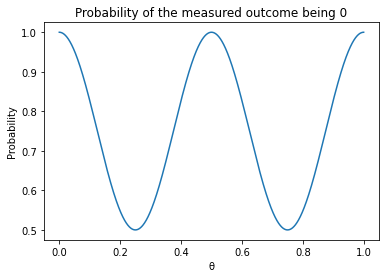

In [0]:
ket_psi_1 = ket_0
testing_size = 5000
theta = np.linspace(0., 0.999999, testing_size)
probe = np.empty(testing_size)
for i in range(testing_size):
  angle = 2*np.pi*theta[i]
  ket_psi_2 = np.cos(angle)*ket_0 + np.sin(angle) * ket_1
  probe[i] = swap_test(ket_psi_1, ket_psi_2)

pyplot.plot(theta, probe)
pyplot.title('Probability of the measured outcome being 0')
pyplot.xlabel('θ')
pyplot.ylabel('Probability')